In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Downloading data

In [5]:
gym = pd.read_csv('gym_churn.csv')
gym.head(5)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


# 2. Exploratory Data Analysis (EDA)

In [6]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

The original table has 14 columns and 4000 rows. 10 columns in integer format, 4 columns in float format

In [7]:
#Check for missing values
gym.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

There are no missing values in the table

In [8]:
#check for duplicates
gym.duplicated().sum()

0

There are no duplicates in the table

In [9]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


1. The standard deviation of the total revenue from other fitness center services is 96. This is quite a large spread. We can conclude about the dispersion of customers. Some are willing to buy services above the average value(147)
2. The standard deviation of customers' Lifetime is higher than its average value(3.75 vs. 3.73). There is a large number of clients whose Lifetime does not exceed 3 months, but there are also super loyal clients.
3. more than half of the clients don't visit the fitness center more than twice a week, at the same time for the previous month there is a slight decrease in attendance in comparison with the whole period(average attendance: 1.77 vs. 1.88 times a week)

## The average values of the traits in the two groups - those who left in the exodus and those who stayed

In [10]:
#Filtering by clients who have gone into churn
churn_yes = gym.query('Churn == 1')
#Filtering by clients who have not gone into churn
churn_not = gym.query('Churn == 0')

In [11]:
churn_yes.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


In [12]:
churn_not.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882


According to those who stayed, we can see that they are mostly employees of a partner company of the club, who came on the fact of the initial registration under the "bring a friend" campaign. They also have an average of 6 months of membership compared to 2 months for those who left in the exodus. They are also more likely to attend group classes and spend more on average from other fitness center services(159 vs. 115). They are more loyal customers: their Lifetime is equal to 5 months, and they visit the fitness center twice as often per week

## Bar graphs and feature distributions for those who left (churn) and those who stayed (not in the churn)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


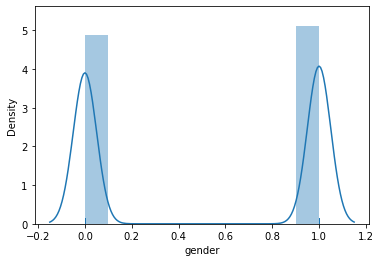

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


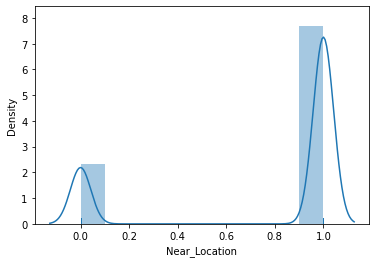

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


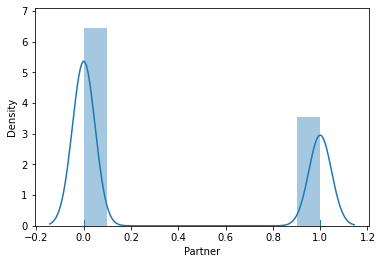

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


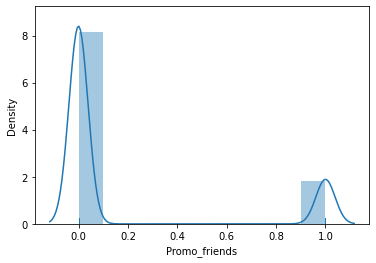

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


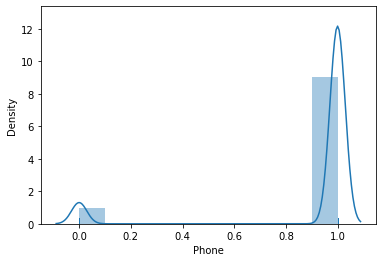

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


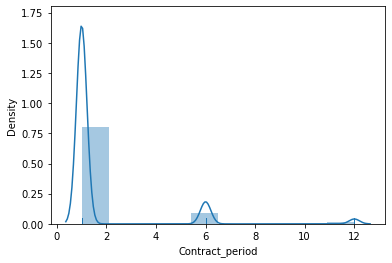

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


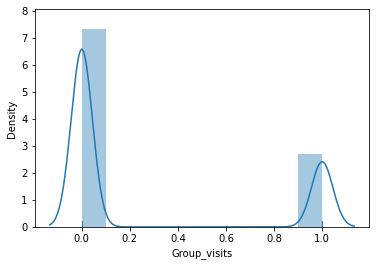

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


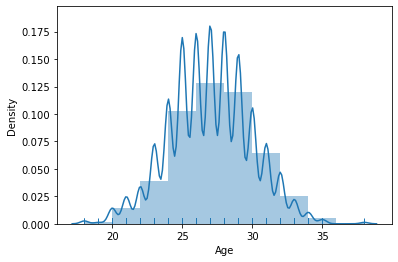

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


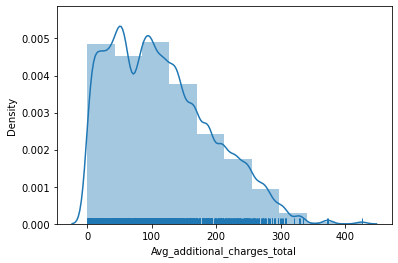

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


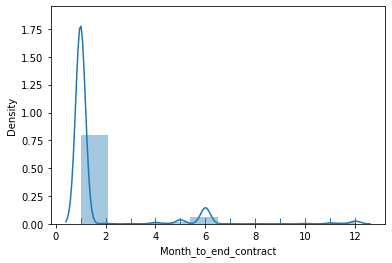

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


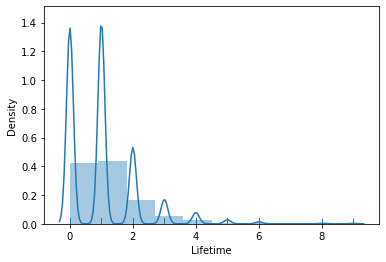

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


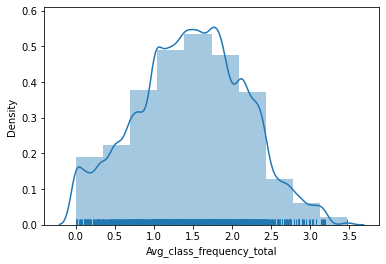

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


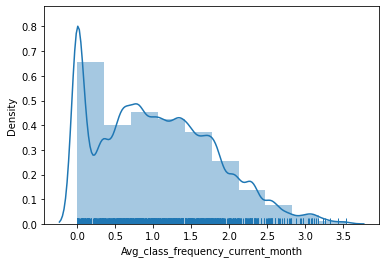

In [13]:
#let's build bar graphs for who left
for col in churn_yes.drop('Churn',axis=1).columns:
    sns.distplot(churn_yes[col], bins = 10, rug=True, hist=True, kde_kws={'bw':0.1})
    plt.show()

Most of the clients who leave will run out of season tickets. Lifetime also in most cases does not exceed 2 months. 

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


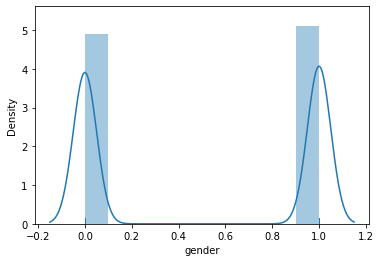

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


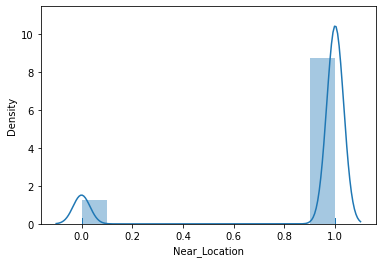

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


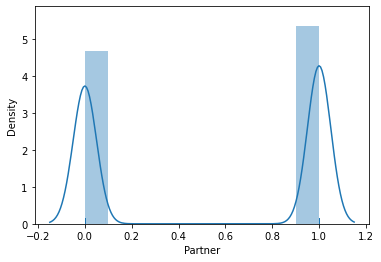

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


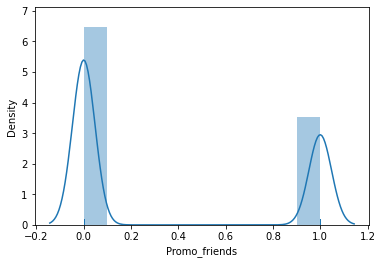

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


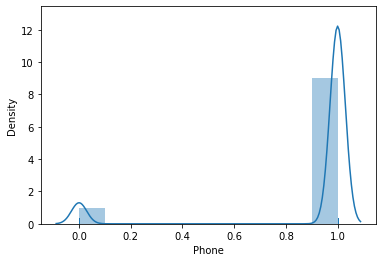

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


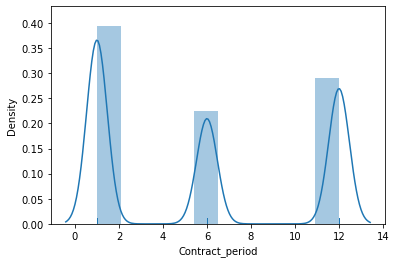

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


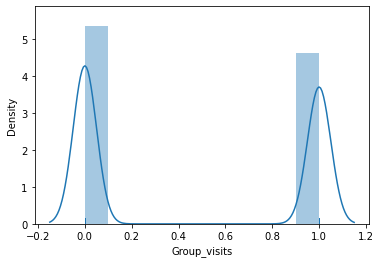

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


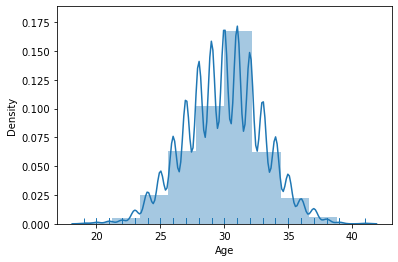

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


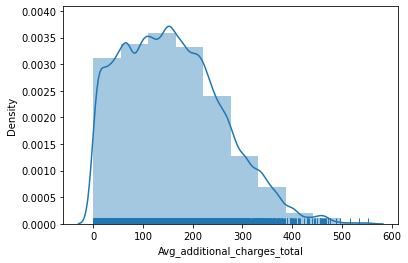

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


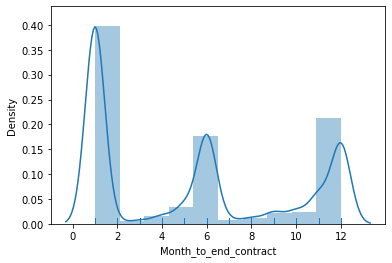

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


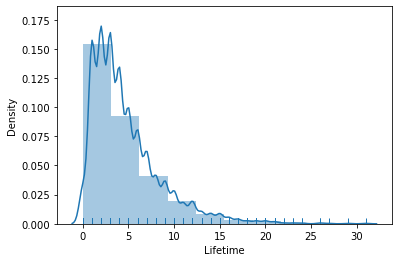

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


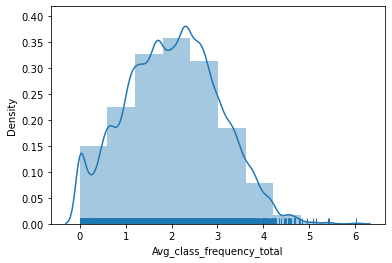

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


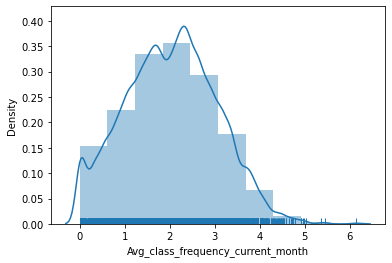

In [14]:
#build bar graphs for who didn't leave
for col in churn_not.drop('Churn',axis=1).columns:
    sns.distplot(churn_not[col], bins = 10, rug=True, hist=True, kde_kws={'bw':0.1})
    plt.show()

We see living or working in the area where the fitness center is located as a weighty argument to attend . The share of clients with an annual subscription is higher than those with a six-month subscription. Weekly visits to the fitness center are close to 3 per week

## Correlation matrix 

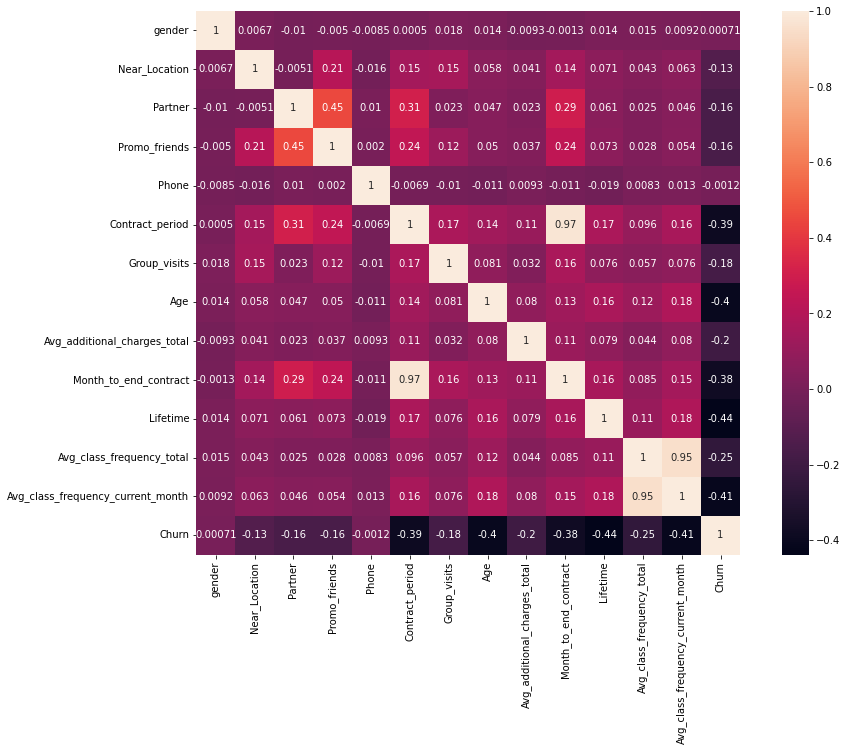

In [15]:
#let's build and draw a correlation matrix
cm = gym.corr()
fig, ax = plt.subplots(figsize=(15,10))

#draw a heat map with captions for the correlation matrix
sns.heatmap(cm, annot = True, square=True)
ax.set_ylim(14, 0)
plt.show()

1. Practically identical direct correlation between the term to the end of the current active season ticket and the duration of the current active season ticket
2. Practically identical direct correlation between the average frequency of visits per week for the whole time since the beginning of the subscription and the average frequency of visits per week for the previous month. Customers tend to visit the fitness center in a constant for themselves mode
3. High direct correlation between the employees of the company-partners of the club and the fact of initial enrollment in the promotion "bring a friend"(0.45). Attracting new employees among partner companies increases the effectiveness of a promo code from an acquaintance when paying for the first membership
4. High direct correlation between the employees of the company-partners of the club and the duration of the current active subscription(0.31). Growth among new clients between employees of the company-partners increases the average duration of a subscription
5. We also see a direct correlation among those who came by promotional code and the duration of a subscription(0.24).These are loyal clients for the fitness club
6. The more customers go out, the lower the Lifetime(-0.44). New clients don't stick around the club
7. The more clients go into churn, the fewer times they exercise per week(-0.41). Clients lose interest in going to the club over time
8. There is an inverse relationship between client churn and client age(-0.4). Younger clients are more likely to stop going to the club
9. Clients who run out of season tickets also leave(-0.39). Clients do not renew their season tickets for a new period

# 3. Model for predicting user churn
### Binary user classification model, where the target attribute is the fact of user churn in the next month:
### Logistic regression

In [16]:
# divide our data into attributes (matrix X) and target variable (y)
X = gym.drop('Churn', axis = 1)
y = gym['Churn']

In [17]:
# divide the model into a training sample and a validation sample
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [18]:
# train StandartScaler on a training sample
scaler = StandardScaler()
scaler.fit(X_train)

# Convert the training and validation dataset
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [19]:
# let's set the algorithm for our model
model = LogisticRegression(random_state=0)

In [20]:
# train the model
model.fit(X_train_st,y_train)

LogisticRegression(random_state=0)

In [21]:
# let's use a model already trained to make predictions
probabilities = model.predict_proba(X_test_st)[:,1]

In [22]:
# binary prediction
predictions = model.predict(X_test_st)

In [23]:
# let's derive all the studied metrics for the obtained prediction
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score (y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score (y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, predictions)))

Accuracy: 0.92
Precision: 0.85
Recall: 0.83
F1: 0.84
ROC_AUC: 0.89


High proportion of correct answers(Accuracy = 0.92). Fairly high proportion of predictions relative to "1" class(Precision = 0.85) and proportion of real objects of "1" class(Recall = 0.83). But it may be worth adjusting the metrics a bit. The balance between metrics is also quite good (F1 = 0.84). The quality score of the classification model is good (ROC_AUC = 0.89)
Let's slightly adjust the threshold of classes (set threshold = 0.4)

In [24]:
# set the threshold
threshold = 0.4

# based on the probabilities and class ratios let's calculate predict
custom_predictions = [0 if i<threshold else 1 for i in probabilities]

# let's derive all the studied metrics for the new threshold prediction
print('Metrics for prediction with custom threshold')
print('Accuracy for custom: {:.2f}'.format(accuracy_score(y_test, custom_predictions)))
print('Precision for custom: {:.2f}'.format(precision_score(y_test, custom_predictions)))
print('Recall for custom: {:.2f}'.format(recall_score(y_test, custom_predictions)))
print('F1 for custom: {:.2f}'.format(f1_score(y_test, custom_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, predictions)))

Metrics for prediction with custom threshold
Accuracy for custom: 0.92
Precision for custom: 0.82
Recall for custom: 0.85
F1 for custom: 0.83
ROC_AUC: 0.89


We see a slight decrease in forecast accuracy (from 0.85 to 0.82) and in balance among metrics (from 0.84 to 0.83). However, the priority metric recall increased (from 0.83 to 0.85). Also, the important metric ROC_AUC remained unchanged.
It makes sense to use exactly custom version of logistic regression

### Random Forest

In [25]:
# let's set the algorithm for the new model based on the random forest algorithm
rf_model = RandomForestClassifier(n_estimators = 100)

In [26]:
# train a random forest model
rf_model.fit(X_train_st, y_train)

RandomForestClassifier()

In [27]:
# let's use a model already trained to make predictions
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]

In [28]:
# let's derive all the studied metrics
print('Metrics for the decision tree')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, rf_predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, rf_predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, rf_predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, rf_predictions)))
print('ROC_AUC: {:.2f}'.format(roc_auc_score(y_test, rf_predictions)))

Metrics for the decision tree
Accuracy: 0.91
Precision: 0.83
Recall: 0.81
F1: 0.82
ROC_AUC: 0.88


Compared to the custom version of the logistic regression, the precision metric for the Random Forest model is slightly higher (0.84 vs. 0.82), but more importantly, the recall is lower (0.83 vs. 0.85). The values of the other metrics are equal.
Prioritizing recall as a metric showing the share of real objects, it is preferable to use a logistic regression model with a custom threshold(threshold = 0.4) 

# 4. Clustering of users

In [29]:
#Standardize data
scaler = StandardScaler() # create an object of class scaler (normalizer)
x_sc = scaler.fit_transform(gym.drop(columns = ['Churn'])) # train the normalizer and transform the dataset

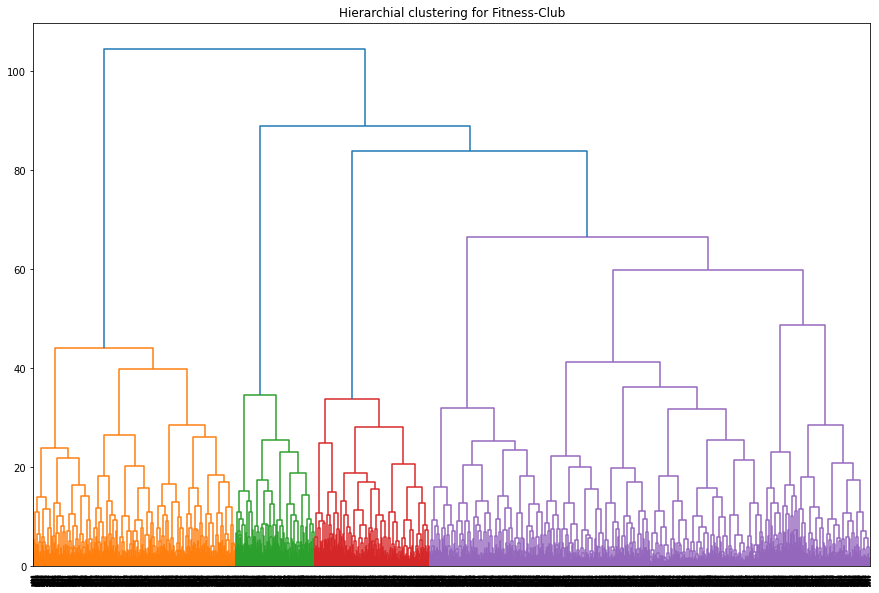

In [30]:
#Create the distance matrix with linkage() on the standardized feature matrix 
linked = linkage(x_sc, method = 'ward')
#drawing the dendrogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for Fitness-Club')
plt.show()

After clustering, 4 clusters of clients were formed (let's agree for the number of clusters to take n = 5, according to the condition of the project, so that the results can be compared with the results of the other students)

In [31]:
#Train the clustering model based on the K-Means algorithm and predict clusters of clients. 
# we define a k_means model with the number of clusters 5
km = KMeans(n_clusters = 5)

In [32]:
# predict clusters for observations
labels = km.fit_predict(x_sc)

In [33]:
# save the cluster labels in the field of our dataset
gym['Cluster'] = labels

In [34]:
# outputs statistics on the average values of our attributes in the cluster
gym_avg = gym.groupby('Cluster').mean()
gym_avg

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
Cluster,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
1,0.487013,1.000000,0.348214,0.235390,1.0,1.963474,0.340909,28.137175,130.879377,1.872565,2.357955,1.231850,0.993295,0.522727
2,0.556845,0.979118,0.359629,0.238979,1.0,2.583527,0.468677,30.107889,161.553538,2.383991,4.948956,2.808056,2.802590,0.071926
3,0.500988,0.960474,0.782609,0.573123,1.0,10.897233,0.542490,29.979249,160.821548,9.956522,4.722332,1.991683,1.984860,0.027668
4,0.496063,0.000000,0.460630,0.078740,1.0,2.375984,0.218504,28.486220,135.544499,2.222441,2.811024,1.666510,1.485248,0.440945


1. In the zero cluster clients have the highest churn rate(0.53), and they all live or work in the area of the fitness center. They go to the fitness center the least often(once a week), they run out of season tickets(less than two months to go)  
2. The first cluster of customers have the longest membership (12 months) and the highest total revenue from other services of the fitness center (165). Most of them are employees of the company-partners of the club(0.74). Half of them came from promotions(0.49). At the same time among these customers the lowest churn(0.02)  
3. The second cluster of customers do not live in the area where the fitness club is located. Also low for the cluster are promotions(0.08) and group classes(0.22). And high churn rate(0.45).
4. In the third cluster of clients, all came from promotions. They live or work in the area where the fitness center is located and a large proportion of them are employees of the club's partner company. 
5. The fourth cluster of customers is the most promising. It has the largest Lifetime (5 months). The biggest number of visits to the fitness club per week(about three times). Very low churn(0.07) and high total revenue from other fitness center services(162). At the same time they did not come by promo code and are not partners of the fitness club, but live or work close to it.

In [35]:
#Distribution of features for clusters
# Define the function for drawing of pairwise feature plots for clusters
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


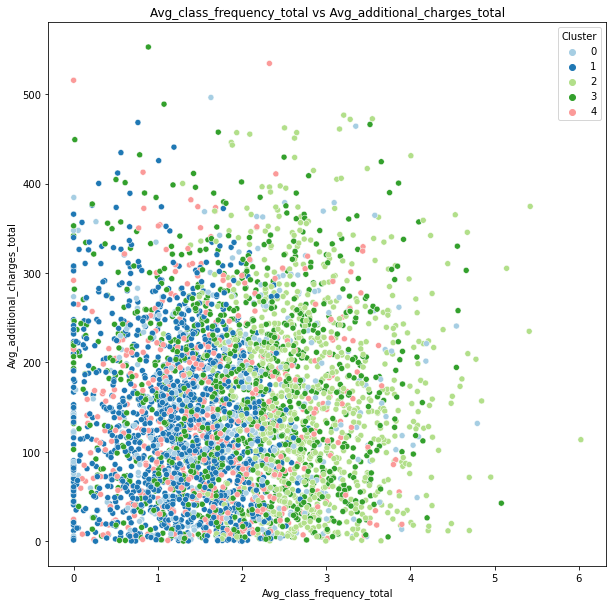

In [36]:
# let's draw graphs for a pair of attributes Average frequency of visits per week for all time since the beginning of the subscription 
# and Total revenue from other fitness center services
show_clusters_on_plot(gym, 'Avg_class_frequency_total', 'Avg_additional_charges_total', 'Cluster')

For the 4th cluster of clients we see higher attendance of the fitness club than for other clusters, with good total revenues from other services of the fitness center. At the same time, only among this cluster there are clients who go to the club more than 5 times a week.
The first cluster of customers also has good attendance rates at the center, with some customers who spend above average on other fitness center services
Among the third cluster of customers(those who came by promo code) there are high values in terms of revenue for services, but they visit the center less than the clusters described above. Obviously, in this cluster there is a category of customers who are ready to buy additional services, but also those who quite quickly will stop coming often and go into outflow

In [37]:
#For each cluster obtained, the outflow fraction 
gym.groupby('Cluster').agg({'Churn':'mean'}).sort_values(by='Churn',ascending=False)

,Churn
Cluster,
1,0.522727
4,0.440945
0,0.266839
2,0.071926
3,0.027668


More than half of the clients in cluster zero left (0.53). Also almost half (0.45) of the clients churned in cluster two. In the fourth and first cluster churn rate is minimal (0.7 and 0.2, respectively)

# 5. Findings

Compared to the custom version of the logistic regression, the precision metric for the Random Forest model is slightly higher (0.84 vs. 0.82), but more importantly, the recall is lower (0.83 vs. 0.85). The values of the other metrics are equal.
Prioritizing recall as a metric showing the share of real objects, it is preferable to use logistic regression model with a custom threshold (threshold = 0.4) 

After clustering, 4 clusters of clients were formed (let's agree to take n=5 as the number of clusters, according to the project, so the results can be compared with the results of other students)

The zero cluster of customers has the highest churn rate (0.53), and they all live or work in the area of the fitness center. They are the least likely to go to the fitness center(once a week), they are running out of season tickets(less than two months to go)

The first cluster of customers have the most long-term subscriptions(12 months) and the highest total revenue from other services of the fitness center(165). Most of them are employees of the company-partners of the club(0.74). Half of them came from promotions(0.49). At the same time among these customers the lowest churn(0.02)

The second cluster of customers do not live in the area where the fitness club is located. Also low for the cluster are promotions(0.08) and group classes(0.22). And a high churn rate(0.45).

In the third cluster of clients, all came from promotions. They live or work in the area where the fitness center is located and a large proportion of them are employees of the company partners of the club.

The fourth cluster of customers is the most promising. It has the largest Lifetime (5 months). It has the most visits to the fitness club per week(about three times). Very low churn(0.07) and high total revenue from other fitness center services(162). At the same time they did not come by promo code and are not partners of the fitness club, but live or work close to it.

## Basic guidelines for working with clients

Consider three clusters of clients as a priority:
- The fourth cluster of customers most often go to the center, while not usually being an employee of a partner company of the club. Such clients need to be retained. You can offer them a loyalty program to increase their Lifetime.
- The first cluster has the most "profitable" clients. They have the biggest revenues and the longest subscriptions.  You can develop for them a promotion on additional services of the fitness center ("All Inclusive")
- In the third cluster of customers, all came on a promotional offer. They live or work in the area where the fitness center is located and a large percentage of them are employees of a partner company of the club. You can offer them a continuation of the flyer campaign. For bringing a friend they will get a discount on a membership